In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [162]:
X = np.array([-3.0, -2.5, -1.0, 0.0, 2.0, 4.0, 5.0])

mu1, sigma1 = -4.0, np.sqrt(1.0)
mu2, sigma2 = 0.0, np.sqrt(0.2)
mu3, sigma3 = 8.0, np.sqrt(3.0)


p1 = norm(loc = mu1, scale = sigma1)
p2 = norm(loc = mu2, scale = sigma2)
p3 = norm(loc = mu3, scale = sigma3)


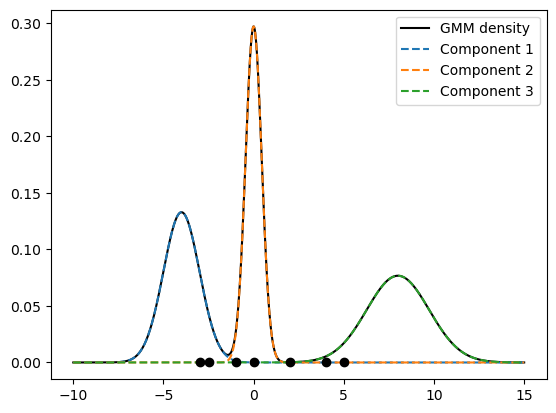

In [163]:
x = np.linspace(-10,15,num = 1000)
plt.plot(x, (1/3) * p1.pdf(x=x) + (1/3) * p2.pdf(x=x) + (1/3) * p3.pdf(x=x), '-', color = 'black', label = 'GMM density')
plt.plot(x, (1/3)*p1.pdf(x=x), '--', label = 'Component 1')
plt.plot(x, (1/3)*p2.pdf(x=x), '--', label = 'Component 2')
plt.plot(x, (1/3)*p3.pdf(x=x), '--', label = 'Component 3')
plt.plot(X, np.zeros_like(X), 'o', color = 'black')
plt.legend()

In [164]:
# Responsibility

N = len(X)  # N : the number of data
K = 3       # K : the number of GMM components

MU = np.array([mu1, mu2, mu3])
SIGMA = np.array([sigma1, sigma2, sigma3])
PI = np.array([1/3, 1/3, 1/3])

Res = np.zeros((N,K))   # Responsibility Matrix

def k_comp_likelihood(data, n,k, MU, SIGMA, PI):
    p = PI[k]*norm(loc = MU[k], scale = SIGMA[k]).pdf(x = data[n])
    return p

def responsibility(data,n, k, MU, SIGMA, PI):
    r_nk = k_comp_likelihood(data, n,k, MU, SIGMA, PI)/np.sum([k_comp_likelihood(data, n,i, MU, SIGMA, PI) for i in range(K)])
    return r_nk

def Responsibilities(data, N,K, MU, SIGMA, PI):
    N = len(data)
    K = len(MU)
    Res = np.zeros((N,K))
    for n in range(N):
        for k in range(K):
            Res[n,k] = responsibility(data, n,k, MU, SIGMA, PI)

    return Res

Res = Responsibilities(X, N,K, MU, SIGMA, PI)
print(Res)

[[9.99999998e-01 6.23744026e-10 1.66078939e-09]
 [9.99998854e-01 1.12775436e-06 1.86148295e-08]
 [5.70694724e-02 9.42926461e-01 4.06623892e-06]
 [1.50000042e-04 9.99843983e-01 6.01744506e-06]
 [9.93708362e-06 6.62368700e-02 9.33753193e-01]
 [3.15686365e-13 2.36801785e-16 1.00000000e+00]
 [2.00021110e-17 1.24761973e-26 1.00000000e+00]]


In [165]:
X@Res

array([-5.55704673, -0.81045554, 10.86750227])

In [240]:
# EM algorithm

def update_mean(data, MU, SIGMA, PI):
    N = len(data)
    K = len(MU)
    Res = Responsibilities(data, N, K, MU, SIGMA, PI)
    N_k = Res.sum(axis = 0)         # total responsibility of the k-th mixture component
    MU = data@Res / N_k
    return MU

update_mean(X, MU, SIGMA, PI)



array([-2.70123001, -0.40341072,  3.70428735])

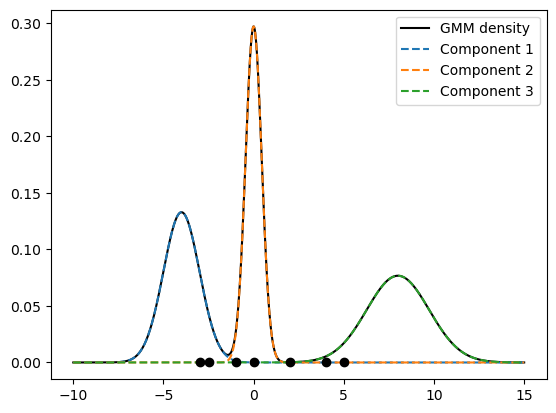

In [157]:


GMM_comps = [p1,p2,p3]

x = np.linspace(-10,15,num = 1000)
plt.plot(x, (1/3) * p1.pdf(x=x) + (1/3) * p2.pdf(x=x) + (1/3) * p3.pdf(x=x), '-', color = 'black', label = 'GMM density')
plt.plot(x, (1/3)*p1.pdf(x=x), '--', label = 'Component 1')
plt.plot(x, (1/3)*p2.pdf(x=x), '--', label = 'Component 2')
plt.plot(x, (1/3)*p3.pdf(x=x), '--', label = 'Component 3')
plt.plot(X, np.zeros_like(X), 'o', color = 'black')
plt.legend()

In [311]:
class EM_algorithm():
    def __init__(self, data, num_components):
        self.N = len(data)
        self.K = num_components
        self.data = data
        self.data_range = np.linspace(np.min(self.data)-10,np.max(self.data)+10, num = 1000)

    def initialize_params(self):
        self.MU = np.array([np.mean(self.data)]*self.K)
        self.SIGMA = np.array([np.std(self.data)]*self.K)
        self.PI = np.array([1/self.K]*self.K)
        self.components = [norm(loc = self.MU[i] , scale = self.SIGMA[i]) for i in range(self.K)]
        self.pdfs = np.array([self.components[i].pdf(x = self.data_range) for i in range(self.K)])

    def set_params(self, MU, SIGMA, PI):
        self.MU = MU
        self.SIGMA = SIGMA
        self.PI = PI
        self.components = [norm(loc = self.MU[i] , scale = self.SIGMA[i]) for i in range(self.K)]
        self.pdfs = np.array([self.components[i].pdf(x = self.data_range) for i in range(self.K)])


    def plot(self):
        plt.plot(self.data_range, self.PI@self.pdfs , '-', color = 'black', label = 'GMM density')
        plt.plot(self.data, np.zeros_like(self.data), 'o', color = 'black')
        for k in range(self.K):
            plt.plot(self.data_range, self.PI[k]*self.pdfs[k], '--', label = 'Component {}'.format(k))
        plt.title('GMM clusters')
        plt.legend()
    
    

    def E_step(self):
        def k_comp_likelihood(data, n,k, MU, SIGMA, PI):
            p = PI[k]*norm(loc = MU[k], scale = SIGMA[k]).pdf(x = data[n])
            return p

        def responsibility(data,n, k, MU, SIGMA, PI):
            r_nk = k_comp_likelihood(data, n,k, MU, SIGMA, PI)/np.sum([k_comp_likelihood(data, n,i, MU, SIGMA, PI) for i in range(K)])
            return r_nk

        self.Res = np.zeros((self.N,self.K))
        for n in range(self.N):
            for k in range(self.K):
                self.Res[n,k] = responsibility(self.data, n,k, self.MU, self.SIGMA, self.PI)
        
        return self.Res
    
    def M_step(self, Res):
        N_k = Res.sum(axis = 0)
        MU = self.data@Res / N_k
        centered_data = np.array([self.data - MU[i] for i in range(self.K)])
        VAR = np.array([(centered_data[i]*centered_data[i])@Res[:,i] for i in range(self.K)])/Res.sum(axis = 0)
        SIGMA = np.sqrt(VAR)
        PI = N_k/self.N
        self.set_params(MU, SIGMA, PI)
        



In [316]:
EM = EM_algorithm(data = X, num_components = 3)
EM.initialize_params()
print(EM.MU, EM.SIGMA, EM.PI)

[0.64285714 0.64285714 0.64285714] [2.88734042 2.88734042 2.88734042] [0.33333333 0.33333333 0.33333333]


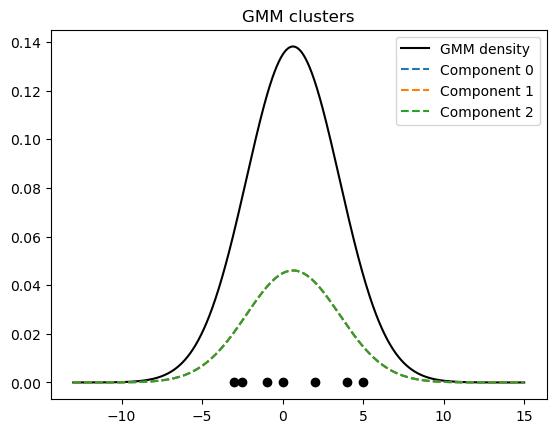

In [317]:
EM.plot()

In [318]:
EM.set_params(MU, SIGMA, PI)
print(EM.MU, EM.SIGMA, EM.PI)

[-4.  0.  8.] [1.         0.4472136  1.73205081] [0.33333333 0.33333333 0.33333333]


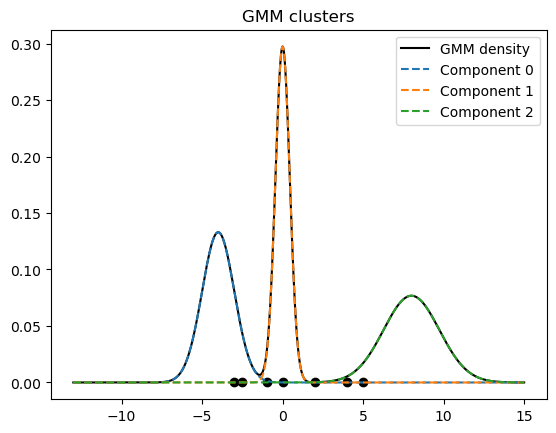

In [319]:
EM.plot()

In [321]:
Res = EM.E_step()

In [322]:
EM.M_step(Res)

In [323]:
EM.MU, EM.SIGMA, EM.PI

(array([-2.70123001, -0.40341072,  3.70428735]),
 array([0.37947316, 0.66218744, 1.23555417]),
 array([0.29388975, 0.28700121, 0.41910904]))

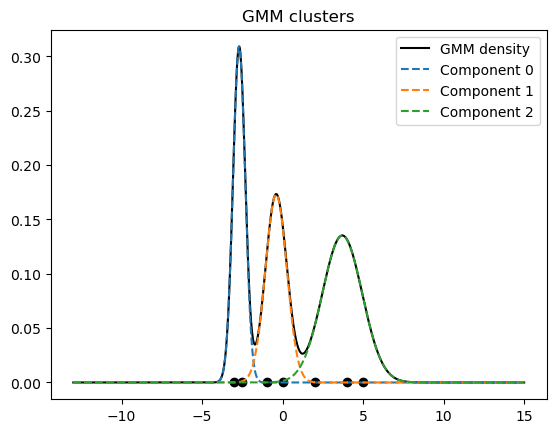

In [324]:
EM.plot()

In [300]:
MU_ = update_mean(X, MU, SIGMA, PI)
X0 = X - MU_[0]
X1 = X - MU_[1]
X2 = X - MU_[2]
new_data = np.array([X0, X1, X2])
np.array([(new_data[i]*new_data[i])@Res[:,i] for i in range(3)])/Res.sum(axis = 0)

array([0.14399988, 0.4384922 , 1.52659412])

In [294]:
MU_

array([-2.70123001, -0.40341072,  3.70428735])

In [297]:
r0 = Res[:,0]
r0

array([9.99999998e-01, 9.99998854e-01, 5.70694724e-02, 1.50000042e-04,
       9.93708362e-06, 3.15686365e-13, 2.00021110e-17])

In [298]:
r0.sum()

2.057228260869018

In [293]:
(np.inner(X0*X0, r0)/r0.sum())

0.14165493879935737

In [291]:
np.inner(X1*X1, r1)/r1.sum()

0.4384922047739593

In [270]:
X0*X0

array([8.92635041e-02, 4.04935188e-02, 2.89418356e+00, 7.29664359e+00,
       2.21015637e+01, 4.49064837e+01, 5.93089437e+01])

In [238]:
new_data*new_data

array([[  1.  ,   2.25,   9.  ,  16.  ,  36.  ,  64.  ,  81.  ],
       [  9.  ,   6.25,   1.  ,   0.  ,   4.  ,  16.  ,  25.  ],
       [121.  , 110.25,  81.  ,  64.  ,  36.  ,  16.  ,   9.  ]])

In [189]:
dev = ((X_ - MU_)*(X_ - MU_)).T
np.array([dev[i] @ Res[:,i] for i in range(3)]) / Res.sum(axis = 0)

array([ 1.83080336,  0.60123241, 19.97974129])

In [231]:
X0@X0

209.25

In [217]:
Res

array([[9.99999998e-01, 6.23744026e-10, 1.66078939e-09],
       [9.99998854e-01, 1.12775436e-06, 1.86148295e-08],
       [5.70694724e-02, 9.42926461e-01, 4.06623892e-06],
       [1.50000042e-04, 9.99843983e-01, 6.01744506e-06],
       [9.93708362e-06, 6.62368700e-02, 9.33753193e-01],
       [3.15686365e-13, 2.36801785e-16, 1.00000000e+00],
       [2.00021110e-17, 1.24761973e-26, 1.00000000e+00]])

In [215]:
SIGMA*SIGMA

array([1. , 0.2, 3. ])

In [206]:
dev

array([[  1.  ,   2.25,   9.  ,  16.  ,  36.  ,  64.  ,  81.  ],
       [  9.  ,   6.25,   1.  ,   0.  ,   4.  ,  16.  ,  25.  ],
       [121.  , 110.25,  81.  ,  64.  ,  36.  ,  16.  ,   9.  ]])

In [173]:
Res.T@((X_ - MU_)*(X_-MU_))

array([[  3.76638041,  15.30710204, 235.88245834],
       [ 26.86837173,   1.207881  , 142.75170998],
       [178.61524786,  44.73501697,  58.61583168]])

In [168]:
SIGMA*SIGMA

array([1. , 0.2, 3. ])

In [145]:
1.5*1.5

2.25